### Please power on your laptops (and open a jupyter notebook)

## "conda install sympy"

### Last Class
- Deriving difference operators using Taylor series
- Finite difference "algorithms" or "schemes"
- Lax-Friedrichs
- Leap Frong
- Lax-Wendroff
- Well posedness

### This Class
- Python!
- Introduction to Sympy
- We will implement the above algorithms in Python (Lax-Friedrichs & Lax-Wendroff)
- We will discuss different kinds of error

In [3]:
from sympy import * # What's the difference between this and "import sympy" ?
from sympy.abc import x

In [5]:
f = Function('f')
testexpression = x**2 + f(x)
testexpression

x**2 + f(x)

In [7]:
testexpression2 = x**2 * Derivative(f(x),x) - f(x)
testexpression2

x**2*Derivative(f(x), x) - f(x)

If I type here some text 

To write a nicely formatted equation use dollar signs:

$$ x^2 f_x - f(x) = 0 $$

If I type here some text 

To write a nicely formatted equation use dollar signs:

$$ x^2 f_x - f(x) = 0 $$

In [8]:
dsolve(testexpression2, f(x)) ## This will solve the equation testexpression2 == 0 

Eq(f(x), C1*exp(-1/x))

In [9]:
# This function will allow Sympy output to be nicely formatted automatically
init_printing()

In [10]:
dsolve(testexpression2, f(x)) ## This will solve the equation testexpression2 == 0 

### Here we will apply/implement in Python some of the numerical schemes that we learned about in the last class

- Forward Euler
- Lax-Friedrichs
- Lax-Wendroff <--- This is going to be left as an in class exercise

Here we will just consider initial value problems, and the following differential equation (the same we covered in the last class):

$$ f_t = f_x, \quad f(t=0,x) = g(x) $$

In this case, we *know* the exact solution already: $ f(t,x) = g(x+t) $, which is a travelling wave (that has whatever shape the inital conditions created).

Since we know the exact solution, the point of applying the numerical methods will be to learn how to use them and to study how they behave. ** We are not yet ready to apply numerical methods to problems with no known analytical solutions! **

In [12]:
# Some basic first steps, import necessary libraries:
import numpy as np # so that we can write np.numpy_specific_function
%pylab inline
# maybe importing matplotlib isn't needed, let's come back to this later

Populating the interactive namespace from numpy and matplotlib


#### Forward Euler: Forward differencing in time, and central differencing in space

Recall in our class notes, that we derived the following equation as our numerical scheme:

$$ f^{n+1}_j = f^n_j + \lambda/2 (f^n_{j+1} - f^n_{j-1})$$

where $$\lambda = \Delta t / \Delta x $$

$$ f^{n+1}_j = f^n_j + \lambda/2 (f^n_{j+1} - f^n_{j-1}$$

where $$\lambda = \Delta t / \Delta x $$

Let's actually implement this scheme and see what happens...
... so first we need to make the problem a little more concrete:

- Initial conditions: $ f(0,x) = g(x) = exp(-\sigma x^2)$ with $ \sigma = 5 $
- Domain: $ -10 < x < 10 $
- Set a final time: $ t_{final} = T = 5 $
- Choose grid spacing: $ \Delta x = 0.5 $
- Choose a timestep: $ \Delta t = 0.1 $

- Initial conditions: $ f(0,x) = g(x) = exp(-\sigma x^2)$ with $ \sigma = 5 $
- Domain: $ -10 < x < 10 $
- Set a final time: $ t_{final} = T = 5 $
- Choose grid spacing: $ \Delta x = 0.5 $
- Choose a timestep: $ \Delta t = 0.1 $

In [49]:
# Now we write the program to solve f_t = f_x using Forward Euler

# Set the parameters
T = 5
dx = 0.01 # note to self: we don't actually know if this is a good choice
dt = 0.001 # note to self: we don't actually know if this is a good choice
lam = dt/dx # we can't use the variable name "lambda" in Python
sigma = 5

lb = -10 # the "left boundary"
rb = 10 # the "right boundary"

numXpoints = int((rb - lb)/dx) 
numTpoints = int(T/dt)
# if you're not sure whether "int" rounds up or down you can
# use the "floor" and "ceil" functions which specifically round down/up respectively

# matrix of zeros of size numTpoints * numXpoints
f = np.zeros((numTpoints,numXpoints)) 

It is a good idea when writing (even simple) code to frequently check both that it is correct (no typos) and that we understand how it works along the way.
- How many rows/columns do we expect f to have?
- How do we set values in the f matrix?

In [14]:
# First let's check the number of rows, which is the number of time points:
len(f)

In [16]:
# Number of columns in the matrix, which is the number of spatial gridpoints
len(f[0])

In [18]:
# To set an arbitrary value in the matrix
f[0][20] = 1
print(numXpoints, lb)
print(f[0][19], " ", f[0][20])

40 -10
0.0   1.0


In [19]:
f[0][20]

In [23]:
# Now that we know how to set values of our f matrix 
# we can implement the initial conditions

for j in range(numXpoints):
    xj = j*dx + lb
    f[0][j] = exp(-sigma * xj**2)

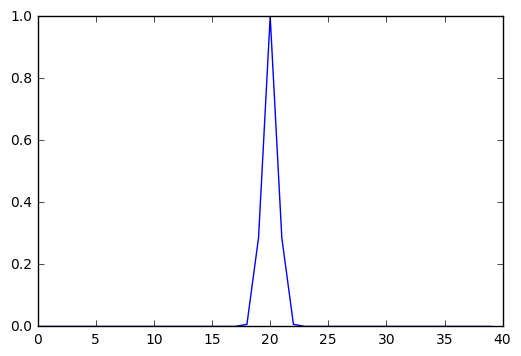

In [24]:
# Let's make a plot to see what it looks like and then we'll take a break
plt.plot(f[0])

In [50]:
# Note that the x-axis isn't correctly labelled
# We can fix this as follows
xdomain = np.arange(lb,rb,dx)
len(xdomain)

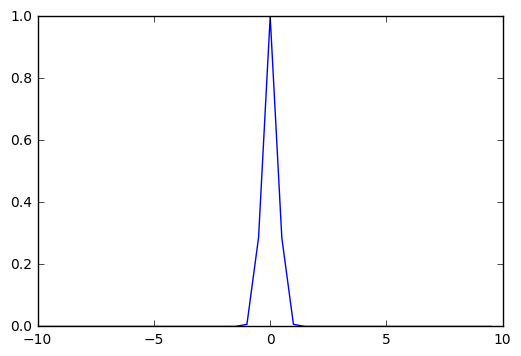

In [26]:
# Plot again, but this time we will provide the x-axis values
plt.plot(xdomain, f[0])

Now we are ready to solve the differential equation.
Recall that we are now going to implement this equation in code:
$$ f^{n+1}_j = f^n_j + \lambda/2 (f^n_{j+1} - f^n_{j-1})$$

In [27]:
# Now we can write the for loop:
for n in range(numTpoints-1):
    for j in range(numXpoints):
        f[n+1][j] = f[n][j] + lam/2 * (f[n][j+1] - f[n][j-1])

IndexError: index 40 is out of bounds for axis 0 with size 40

The above for loop didn't work because we went outside the array boundaries. Not a coding error per se, it's a more fundamental problem... central differencing doesn't work at the boundaries ... unless we do something special. 

One of these "special" techniques is to treat the boundaries as periodic.

In [51]:
# Now that we decided to treat the boundaries periodically
# Let's solve the diff. equation

# Not strictly necessary, but I am going to re-initialize the function
for j in range(numXpoints):
    xj = j*dx + lb
    f[0][j] = exp(-sigma * xj**2)

# Now we will apply periodic boundary conditions to deal with the edges
for n in range(numTpoints-1):
    for j in range(numXpoints):
        
        # define new variables to specific what happens at the edges
        jp1 = j + 1 # what you expect
        jm1 = j - 1 # what you expect
        
        if j == 0: # if j is at the left boundary
            jm1 = numXpoints - 1 # jm1 becomes point at the right boundary
        elif j == numXpoints - 1: # if j is at the right boundary
            jp1 = 0 # jp1 becomes point at the left boundary
        
        f[n+1][j] = f[n][j] + lam/2 * (f[n][jp1] - f[n][jm1])

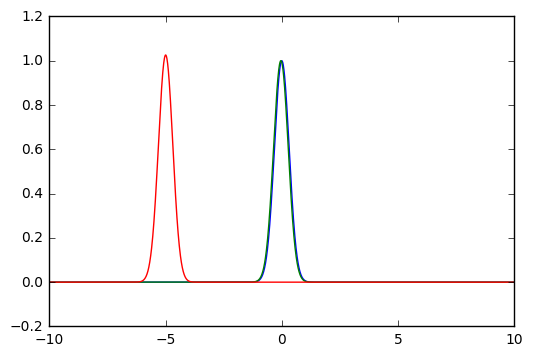

In [52]:
# Now let's plot and see how the solution evolved in time
plt.plot(xdomain, f[0])
plt.plot(xdomain, f[40])
plt.plot(xdomain, f[numTpoints-1])

### Lax-Friedrichs: Adding stability to the Forward Euler method

Recall in our class notes, we modified Forward Euler :

$$ f^{n+1}_j = f^n_j + \lambda/2 (f^n_{j+1} - f^n_{j-1})$$

by making the following *minor* modification:

$$ f^{n+1}_j = (f^n_{j+1}+f^n_{j-1})/2 + \lambda/2 (f^n_{j+1} - f^n_{j-1})$$

Let's implement this and see what happens

In [65]:
# Now we write the program to solve f_t = f_x using Forward Euler

# Set the parameters
T = 5
dx = 0.01 # note to self: we don't actually know if this is a good choice
dt = 0.02 # note to self: we don't actually know if this is a good choice
lam = dt/dx # we can't use the variable name "lambda" in Python
sigma = 5

lb = -10 # the "left boundary"
rb = 10 # the "right boundary"
xdomain = np.arange(lb,rb,dx)

numXpoints = int((rb - lb)/dx) 
numTpoints = int(T/dt)
# if you're not sure whether "int" rounds up or down you can
# use the "floor" and "ceil" functions which specifically round down/up respectively

# matrix of zeros of size numTpoints * numXpoints
f = np.zeros((numTpoints,numXpoints)) 

# Now that we decided to treat the boundaries periodically
# Let's solve the diff. equation

# Not strictly necessary, but I am going to re-initialize the function
for j in range(numXpoints):
    xj = j*dx + lb
    f[0][j] = exp(-sigma * xj**2)

# Now we will apply periodic boundary conditions to deal with the edges
for n in range(numTpoints-1):
    for j in range(numXpoints):
        
        # define new variables to specific what happens at the edges
        jp1 = j + 1 # what you expect
        jm1 = j - 1 # what you expect
        
        if j == 0: # if j is at the left boundary
            jm1 = numXpoints - 1 # jm1 becomes point at the right boundary
        elif j == numXpoints - 1: # if j is at the right boundary
            jp1 = 0 # jp1 becomes point at the left boundary
        
        f[n+1][j] = (f[n][jp1] + f[n][jm1])/2 + lam/2 * (f[n][jp1] - f[n][jm1])

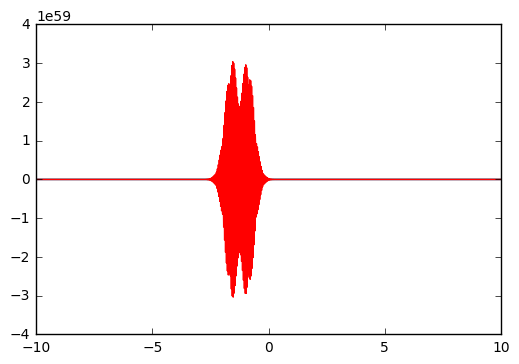

In [66]:
# Now let's plot and see how the solution evolved in time
plt.plot(xdomain, f[0])
plt.plot(xdomain, f[40])
plt.plot(xdomain, f[numTpoints-1])

Forward Euler: $ f^{n+1}_j = f^n_j + \lambda/2 (f^n_{j+1} - f^n_{j-1})$

Lax-Friedrichs: $ f^{n+1}_j = (f^n_{j+1}+f^n_{j-1})/2 + \lambda/2 (f^n_{j+1} - f^n_{j-1})$

Lax-Wendroff: $ f^{n+1}_j = f^n_j + \lambda/2 (f^n_{j+1} - f^n_{j-1}) + \lambda^2/2 (f^n_{j+1} + f^n_{j-1} - 2f^n_j)$

Forward Euler: $ f^{n+1}_j = f^n_j + \lambda/2 (f^n_{j+1} - f^n_{j-1})$

Lax-Friedrichs: $ f^{n+1}_j = (f^n_{j+1}+f^n_{j-1})/2 + \lambda/2 (f^n_{j+1} - f^n_{j-1})$

Lax-Wendroff: $ f^{n+1}_j = f^n_j + \lambda/2 (f^n_{j+1} - f^n_{j-1}) + \lambda^2/2 (f^n_{j+1} + f^n_{j-1} - 2f^n_j)$